<table class="m01-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/yy/dviz-course/blob/master/docs/m10-logscale/lab10.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a href="https://yyahn.com/dviz-course/m10-logscale/lab10/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on Github</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/yy/dviz-course/master/docs/m10-logscale/lab10.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View raw on Github</a>
  </td>
</table>

# Module 10: Logscale

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [22]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference.**

Text(0, 0.5, 'Ratio')

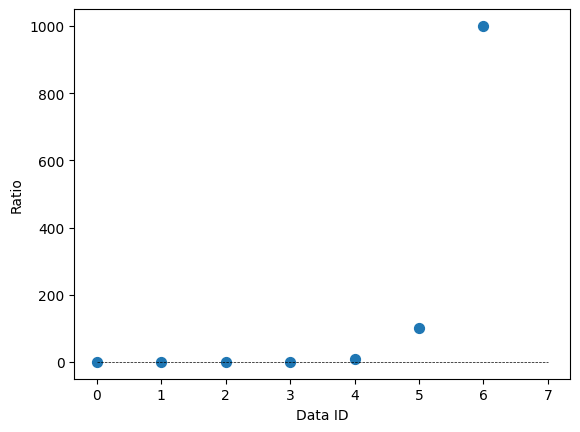

In [23]:
X = np.arange(len(ratio))

# Implement

# YOUR SOLUTION HERE

**Q: Is this a good visualization of the ratio data? Why? Why not? Explain.**

**Q: Can you fix it?**

Text(0, 0.5, 'Ratio')

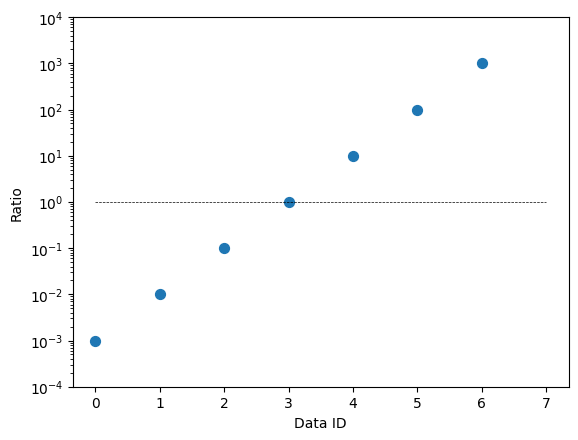

In [24]:
# Implement

# YOUR SOLUTION HERE

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail.

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB Rating`, `IMDB Votes`, `Rotten Tomatoes Rating`.**

In [25]:
# Implement

# YOUR SOLUTION HERE

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each.

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed.**

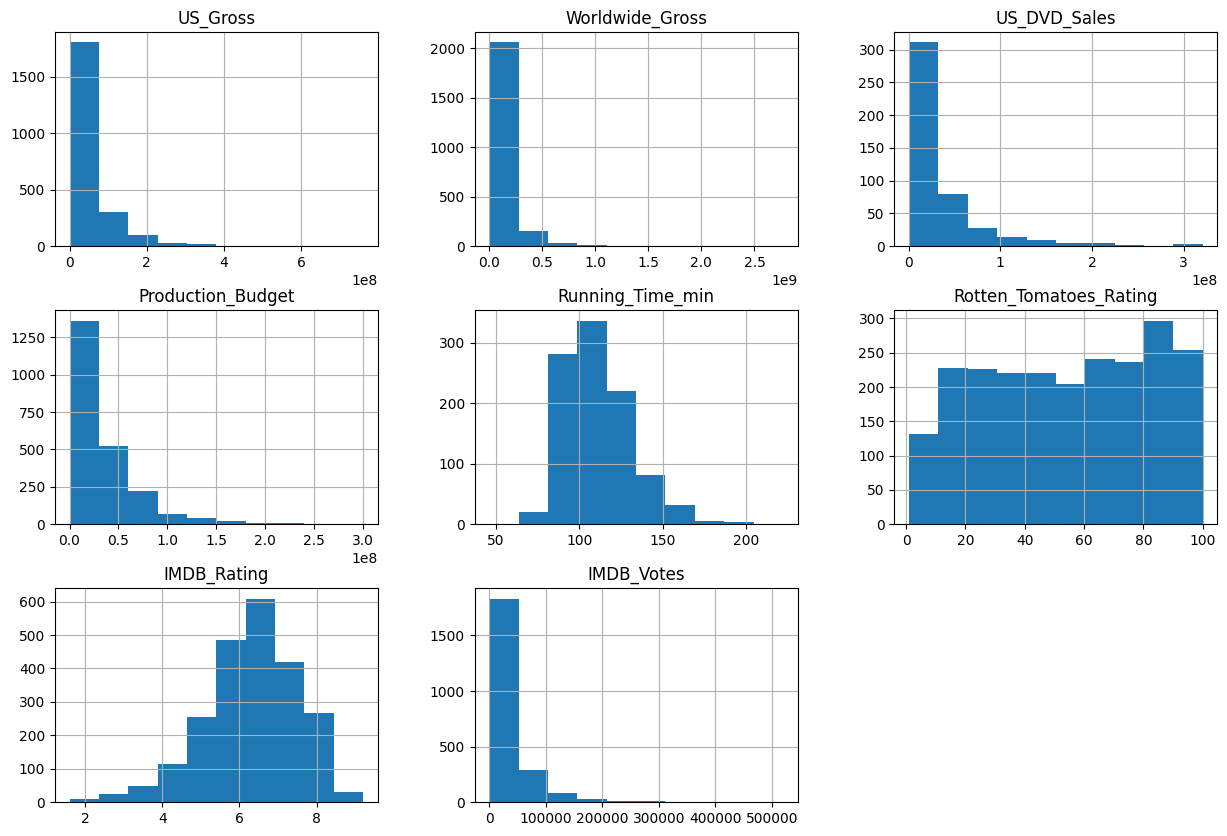

In [26]:
# Implement

# YOUR SOLUTION HERE

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

Text(0, 0.5, 'Frequency')

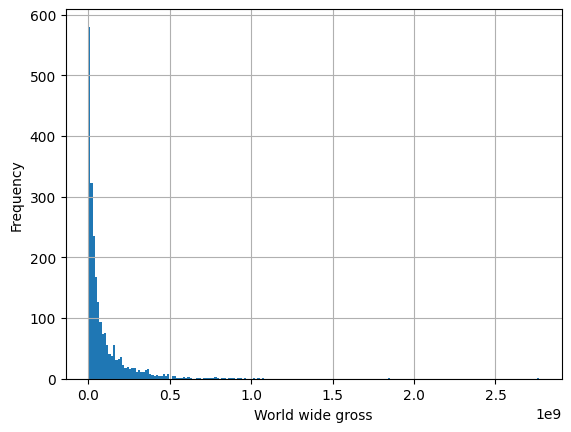

In [27]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. How about changing the vertical scale to logarithmic scale?

Text(0, 0.5, 'Frequency')

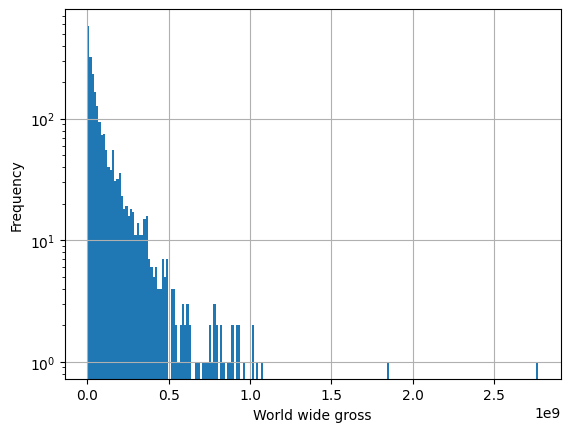

In [28]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_yscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


<Axes: >

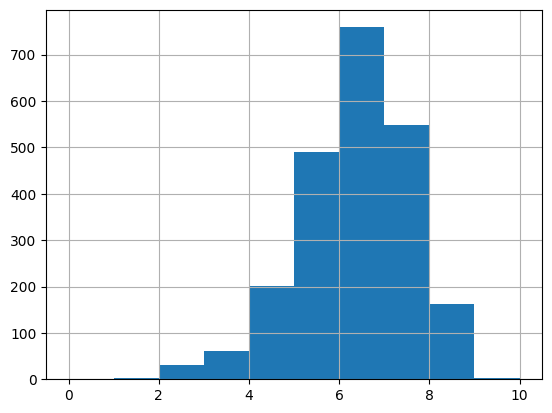

In [29]:
movies["IMDB_Rating"].hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [30]:
min(movies["Worldwide_Gross"])

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [31]:
movies["Worldwide_Gross"] = movies["Worldwide_Gross"]+1.0

In [32]:
# TODO: specify the edges of bins using np.logspace

# YOUR SOLUTION HERE

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale.

Text(0, 0.5, 'Frequency')

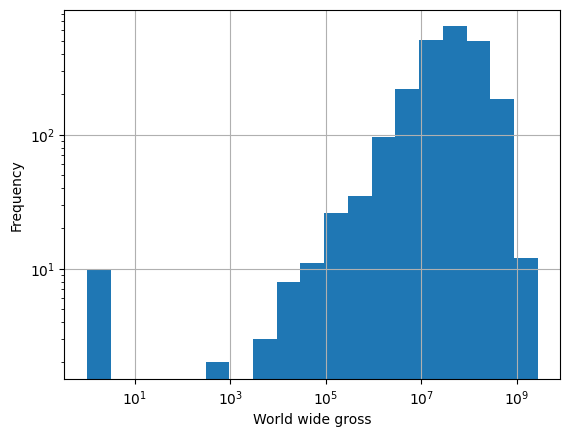

In [33]:
ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

Text(0, 0.5, 'Probability density')

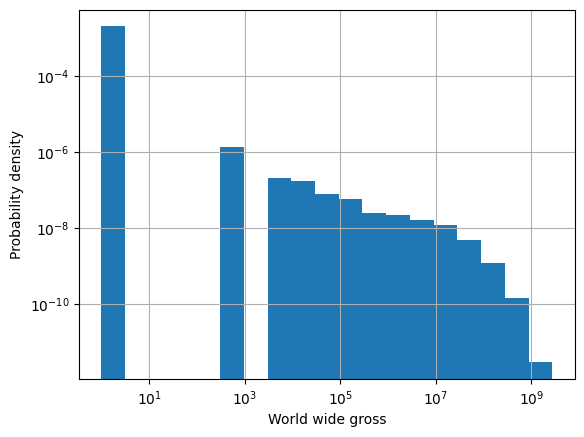

In [34]:
# Implement

# YOUR SOLUTION HERE

**Q: Can you explain the plot? Why are there gaps?**

In [35]:
# YOUR SOLUTION HERE

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite.

**Q: Draw a CCDF of worldwide gross data in log-log scale**

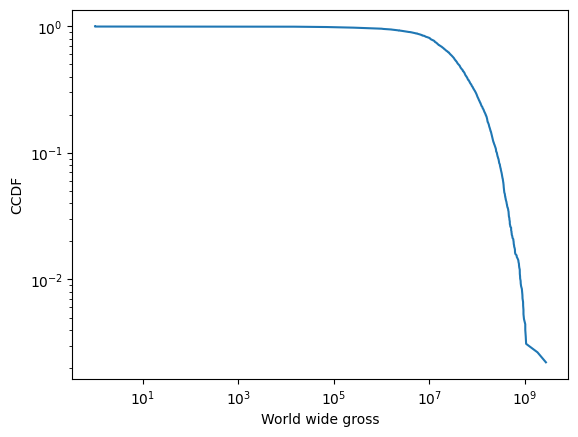

In [36]:
# Implement

# YOUR SOLUTION HERE

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear.

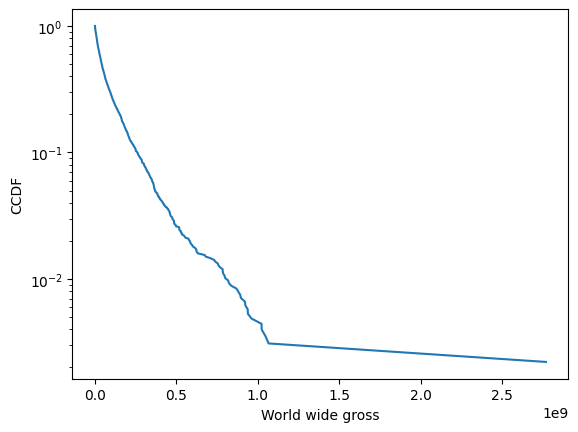

In [37]:
plt.xlabel("World wide gross")
plt.ylabel("CCDF")
plt.plot(worldgross_sorted,Y)
plt.yscale('log')

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money.

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [38]:
# Implement

# YOUR SOLUTION HERE

Title                                  Avatar
US_Gross                          760167650.0
Worldwide_Gross                  2767891500.0
US_DVD_Sales                      146153933.0
Production_Budget                 237000000.0
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                   83.0
IMDB_Rating                               8.3
IMDB_Votes                           261439.0
Name: 1234, dtype: object